In this notebook I am testing if I can get the trace of the affinity for a competitive non-fluorescent ligand from the traces of the Kd_L and Kd_L_App of a fluorescent ligand.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#first let's load in some traces

#This is Abl Gefitinib
DelG_L = np.load("/Users/hansons/Documents/github/fluorescence-plotting-notebooks/competition_quickmodel/Gefitinib_BOT/DeltaG_trace_Gefitinib-GH-2016-11-22 1614.npy")

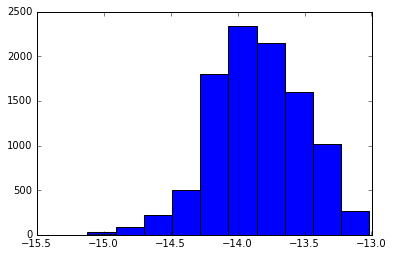

In [3]:
plt.hist(DelG_L);

In [4]:
DelG_L_App = np.load("/Users/hansons/Documents/github/fluorescence-plotting-notebooks/competition_quickmodel/Gefitinib_APP_BOT/DeltaG_trace_Gef-Ima-CD-2016-11-22 1614.npy")

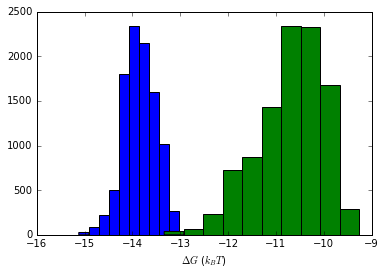

In [5]:
plt.hist(DelG_L);
plt.hist(DelG_L_App);
plt.xlabel('$\Delta G$ ($k_B T$)');

Okay so now using the three component binding model assumption:

$$K_{dL,app} = K_{dL}(1+\frac{[A]}{K_{dA}})$$ 

If we flip that around we get:

$$K_{dA} = \frac{[A]}{\frac{K_{dL,app}}{K_{dL}} - 1}$$ 

We're going to sample through our K_dL and K_dL,app to find our K_dA. Here we're going to take [A] as given at 10 $\mu$M.

In [6]:
A_conc = 10e-6

In [90]:
def Competitive_Affinity(DelG_L,DelG_L_App):
    Kd_L = np.exp(DelG_L)
    Kd_L_App = np.exp(DelG_L_App)
    
    Kd_A = (A_conc) / ((Kd_L_App/Kd_L) -1)
    DelG_A = np.log(Kd_A)
    
    return [Kd_A,DelG_A]
    

In [91]:
np.random.choice(DelG_L,5)

array([-13.9569804 , -14.0155842 , -14.02340185, -13.81080731, -14.03676136])

In [92]:
np.random.choice(DelG_L_App,5)

array([-10.67367116, -10.36366171, -10.7624935 ,  -9.66112735, -10.403502  ])

In [135]:
[Kd_A,DelG_A] = Competitive_Affinity(np.random.choice(DelG_L,8000),np.random.choice(DelG_L_App,8000))

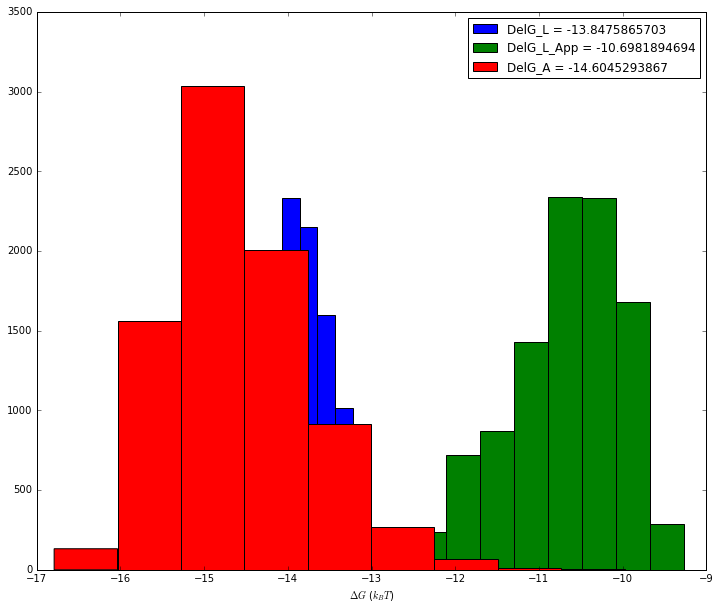

In [136]:
plt.figure(figsize=(12,10))
plt.hist(DelG_L,label='DelG_L = %s' %DelG_L.mean());
plt.hist(DelG_L_App,label='DelG_L_App = %s' %DelG_L_App.mean());
plt.hist(DelG_A,label='DelG_A = %s' %DelG_A.mean());
plt.xlabel('$\Delta G$ ($k_B T$)');
plt.legend(loc=0);

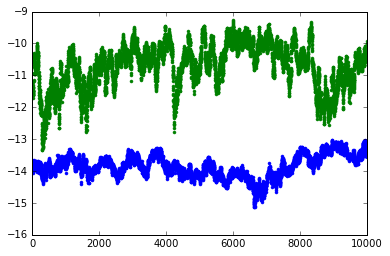

In [137]:
plt.plot(DelG_L,'.');
plt.plot(DelG_L_App,'.');


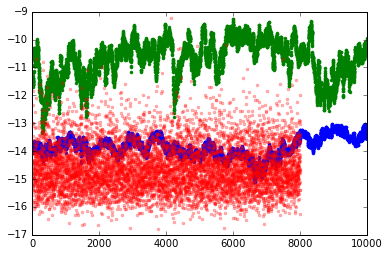

In [138]:
plt.plot(DelG_L,'.');
plt.plot(DelG_L_App,'.');
plt.plot(DelG_A,'.',alpha=0.3);

In [139]:
print 'Abl:Gefitinib Kd = %s M' %np.exp(DelG_L.mean())

Abl:Gefitinib Kd = 9.68432966437e-07 M


In [140]:
print 'Abl:Imatinib Kd = %s M' %np.exp(DelG_A.mean())

Abl:Imatinib Kd = 4.54290313278e-07 M


In [ ]:
#Hmmm affinity should be nanomolar!